In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import os
import numpy as np

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
CIFAR_10_DIR = "../../Datasets/cifar-10-batches-py"

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def read_batch(BASEDIR,batch_id):
    """Function to read one CIFAR-10 batch"""
    BATCH_NAME = "data_batch_" + str(batch_id)
    BATCH_PATH = os.path.join(BASEDIR,BATCH_NAME)
    dict = unpickle(BATCH_PATH)
    return dict

In [5]:
def getCIFAR10Data(num_of_batches):
    #Reads all batches and returns a concatenated dataset
    """Returns CIFAR-10 Dataset"""
    
    d = read_batch(CIFAR_10_DIR,1)
    images,labels = d[b'data'], d[b'labels']
    
    for i in range(2,num_of_batches+1):
        d = read_batch(CIFAR_10_DIR,i)
        n_images,n_labels = d[b'data'], d[b'labels']
        images = np.vstack((images,n_images))
        labels += n_labels #Append the labels
        
    images = images.reshape((-1,3,32,32))
    images = np.transpose(images,(0,2,3,1))
    return images,labels

In [6]:
def parse_image(image,label):
    image = tf.image.resize_images(image, size=[256, 256])
    image = image/255.0
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, label

In [7]:
def readCIFAR10():
    images,labels = getCIFAR10Data(5) 
    print("Reading CIFAR-10 Dataset")
    print(images.shape)
    print("Images loaded successfully!")
   
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(images.shape[0])
    dataset = dataset.map(parse_image, num_parallel_calls=4)
    dataset = dataset.batch(batch_size=1)
    dataset = dataset.prefetch(1)
    
    print("CIFAR10 Data Pipeline is Ready!")
    return dataset

In [9]:
# Test Your Pipeline
dataset = readCIFAR10()


Reading CIFAR-10 Dataset
(50000, 32, 32, 3)
Images loaded successfully!
CIFAR10 Data Pipeline is Ready!


Label  [8]


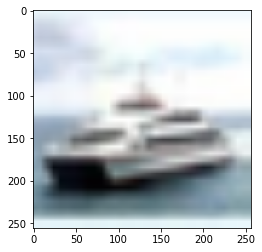

In [17]:
if __name__=="__main__":
    itr = dataset.make_one_shot_iterator()
    import matplotlib.pyplot as plt
    
    for x,y in iter(dataset):
        #draw the first image of first batch and break
        print("Label ",y.numpy())
        plt.imshow(x[0])
        plt.show()
        break
    